# Integrate All ten datasets in one Visualization

### Import modules, set paths, load files:

In [1]:
# !pip install scanpy
# !pip install ipywidgets
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import os

from tqdm import tqdm

In [2]:
# !pip install scarches
# !pip install -U pandas==2.0

import scarches as sca

 captum (see https://github.com/pytorch/captum).


In [3]:
# https://github.com/huggingface/transformers/issues/29763
# pip install transformers==4.37.2
import torch

In [4]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [5]:
sc.set_figure_params(dpi=120, figsize=(8, 8))

In [6]:
adata_concat = sc.read('/home/fanhuan/data/BioInfo/453k/all-with_annotation-pca_200.h5ad')

In [ ]:
sc.tl.pca(adata_concat, n_comps=1000)
adata_concat

In [ ]:
adata_concat.write_h5ad(
    '/home/fanhuan/data/BioInfo/453k/all-with_annotation-pca_1000.h5ad'
)

In [ ]:
adata_concat = sc.read('/home/fanhuan/data/BioInfo/453k/all-with_annotation-pca_1000.h5ad')
adata_concat

In [8]:
sc.tl.tsne(adata_concat, use_rep='X_pca')

# Try out setting more parameters for the t-SNE algorithm

In [12]:
adata_concat

AnnData object with n_obs × n_vars = 453251 × 60286
    obs: 'CL_label'
    var: 'hugo_symbol'
    uns: 'pca', 'tsne', 'CL_label_colors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

### For openTSNE package example usage code:

https://opentsne.readthedocs.io/en/latest/examples/01_simple_usage/01_simple_usage.html

In [13]:
from openTSNE import TSNE

pca_target = adata_concat.obsm['X_pca']
xy = TSNE(perplexity=20, exaggeration=1.5).fit(pca_target)

In [15]:
# create np.array matrix based on the previous calculation result

tsne_p_list = []
for i in tqdm(xy):
        
    temp_list = [i[0], i[1]]
    tsne_p_list.append(temp_list)

tsne_p_array = np.array(tsne_p_list)
tsne_p_array.shape

100%|████████████████████████████████████████████████████| 453251/453251 [00:00<00:00, 533724.42it/s]


(453251, 2)

In [16]:
adata_concat.obsm['X_tsne'].shape

(453251, 2)

In [17]:
adata_concat.obsm['X_tsne_p'] = tsne_p_array
adata_concat

AnnData object with n_obs × n_vars = 453251 × 60286
    obs: 'CL_label'
    var: 'hugo_symbol'
    uns: 'pca', 'tsne', 'CL_label_colors'
    obsm: 'X_pca', 'X_tsne', 'X_tsne_p'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

In [18]:
from openTSNE import TSNE

pca_target = adata_concat.obsm['X_pca']
xy = TSNE(perplexity=20, exaggeration=2.8).fit(pca_target)

In [19]:
# create np.array matrix based on the previous calculation result

tsne_p_list = []
for i in tqdm(xy):
        
    temp_list = [i[0], i[1]]
    tsne_p_list.append(temp_list)

tsne_p_array = np.array(tsne_p_list)
tsne_p_array.shape

100%|████████████████████████████████████████████████████| 453251/453251 [00:00<00:00, 785462.30it/s]


(453251, 2)

In [20]:
adata_concat.obsm['X_tsne_p0'] = tsne_p_array
adata_concat

AnnData object with n_obs × n_vars = 453251 × 60286
    obs: 'CL_label'
    var: 'hugo_symbol'
    uns: 'pca', 'tsne', 'CL_label_colors'
    obsm: 'X_pca', 'X_tsne', 'X_tsne_p', 'X_tsne_p0'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

In [21]:
# sc.pl.embedding(adata_concat, basis='X_tsne_p0', color=['CL_label'], wspace=0.5, frameon=False)

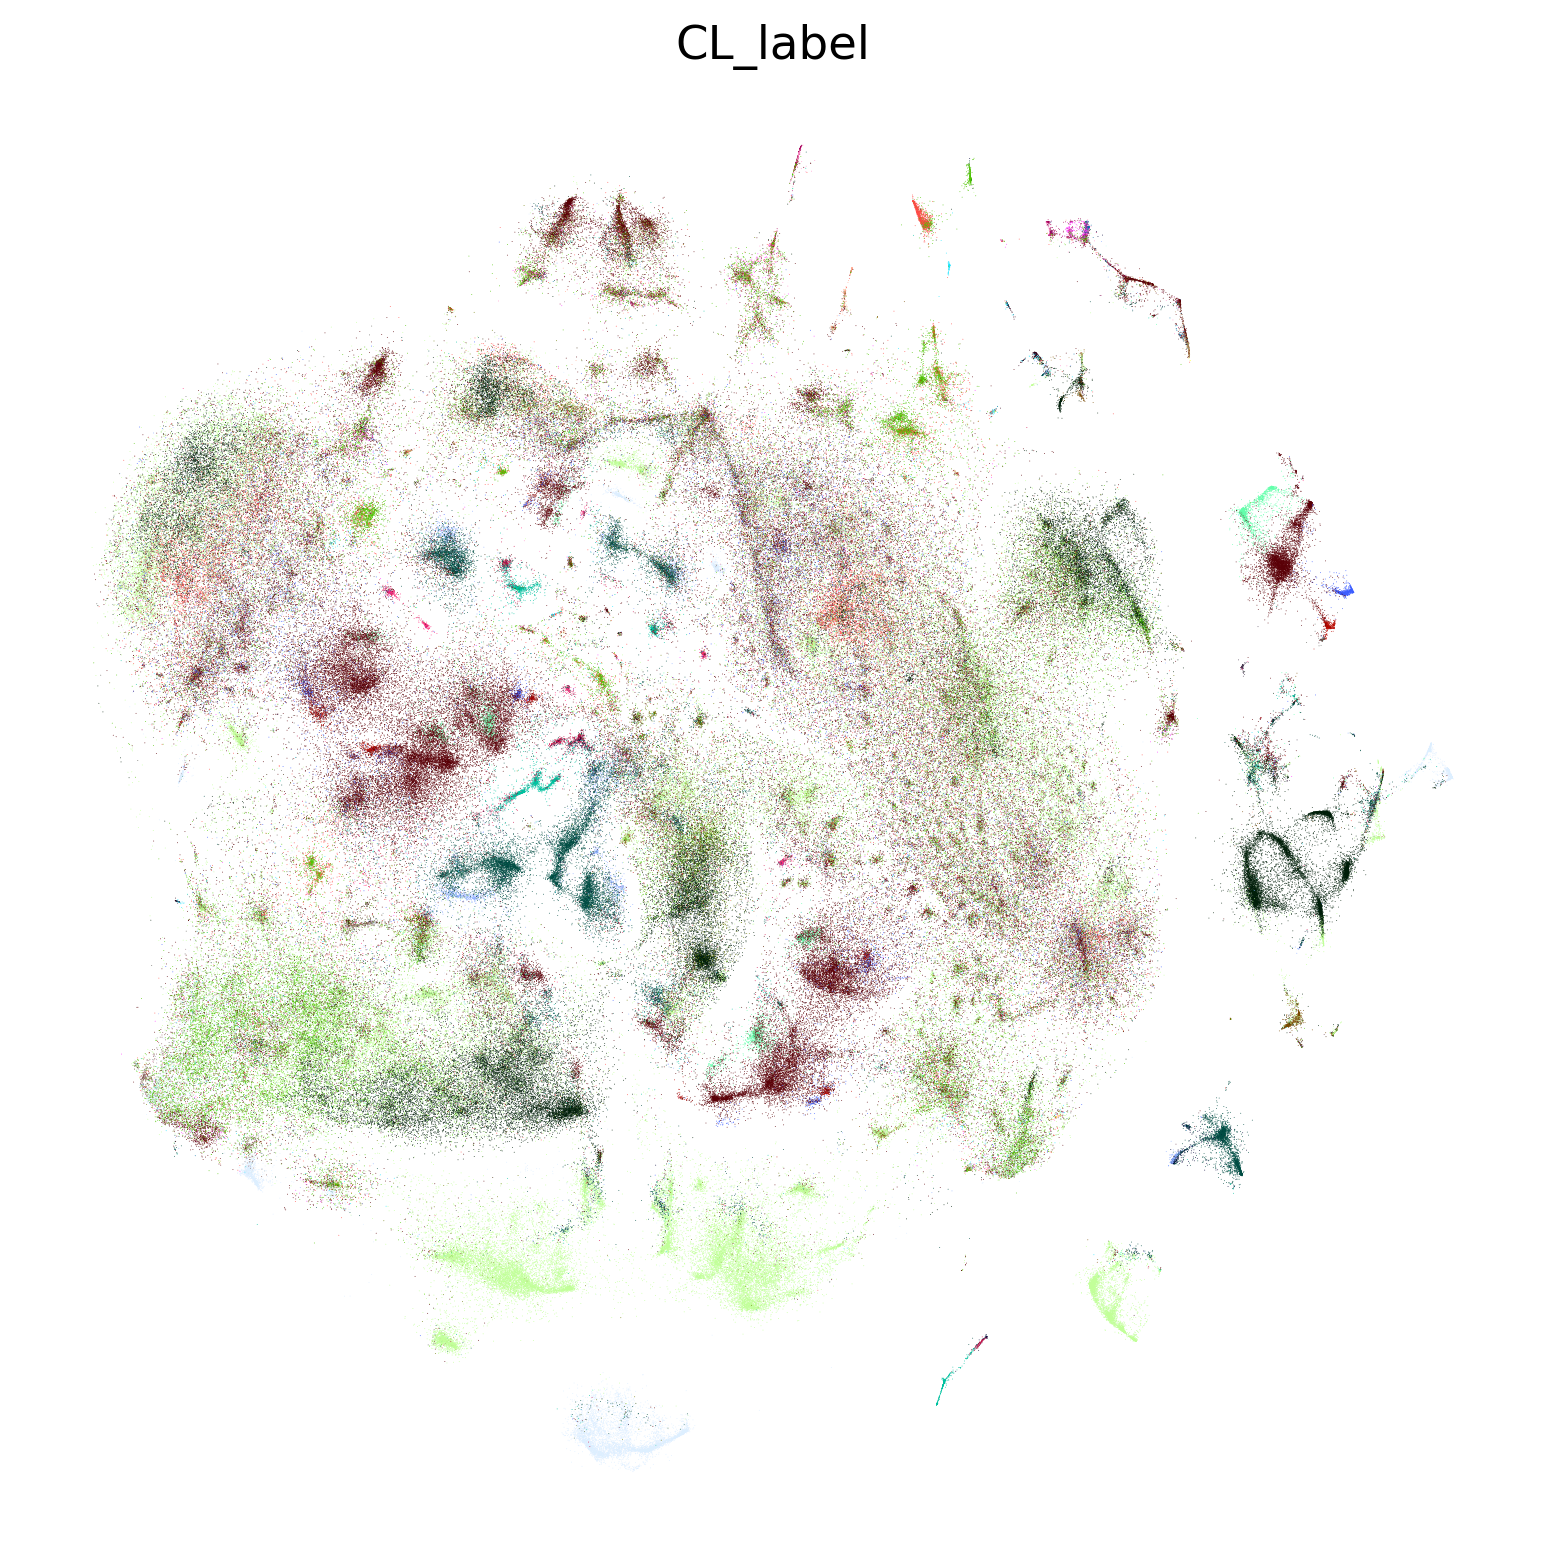

In [22]:
sc.pl.embedding(adata_concat, basis='X_tsne', color=['CL_label'], frameon=False, legend_loc = 'best')

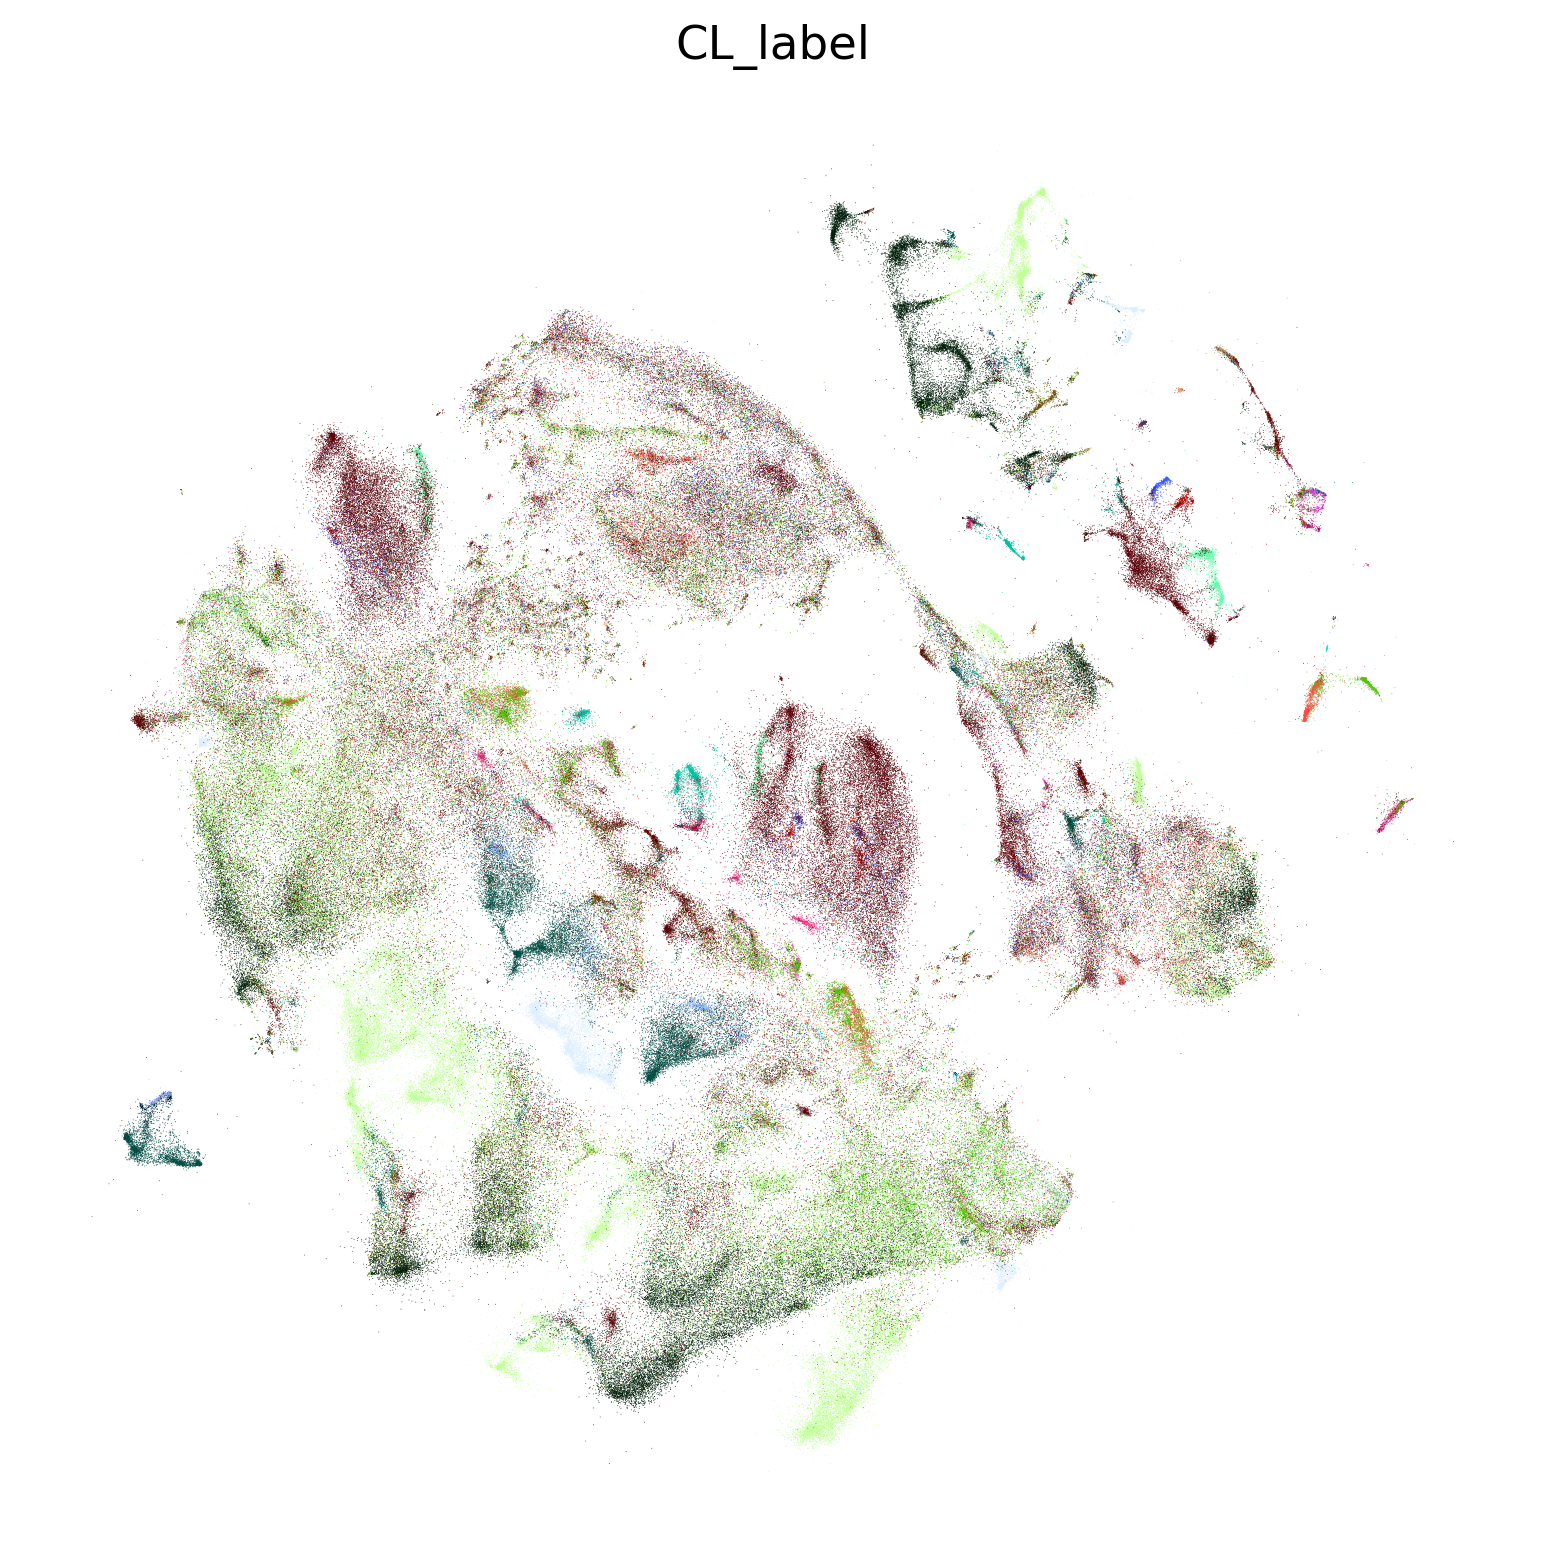

In [23]:
sc.pl.embedding(adata_concat, basis='X_tsne_p', color=['CL_label'], frameon=False, legend_loc = 'best')

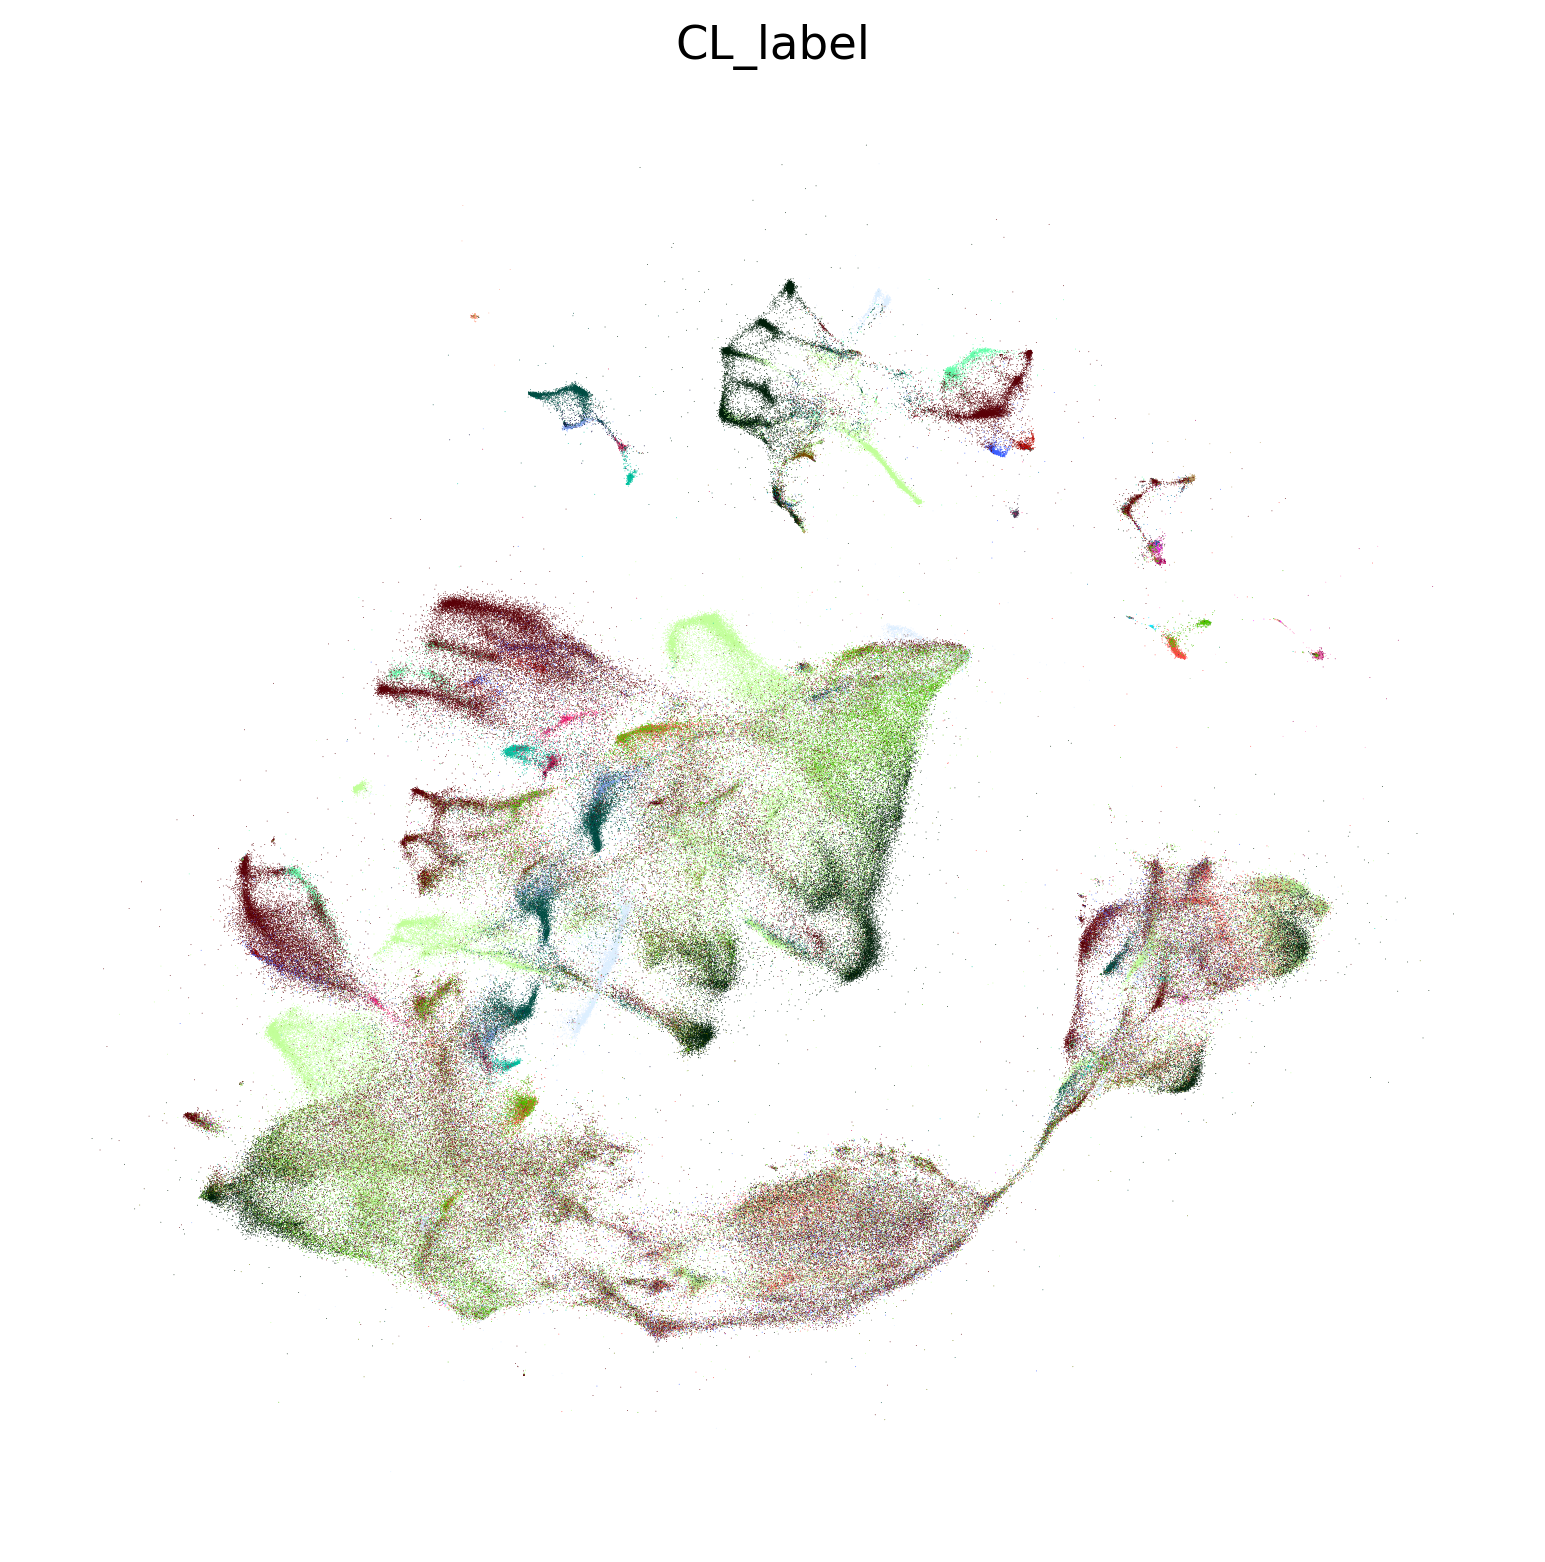

In [24]:
sc.pl.embedding(adata_concat, basis='X_tsne_p0', color=['CL_label'], frameon=False, legend_loc = 'best')